In [1]:
from emoinvest.stock_data_importer.stock_import import get_single_stock
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(precision=2)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from datetime import date

%matplotlib inline

height has been deprecated.



In [2]:
import os, re, sys, time, datetime, copy, shutil
import pandas

import matplotlib.pyplot as plt

df2 = get_single_stock('BMWYY', '2017-01-01', date.today())

temp_data_set = df2

temp_data_set['20d_ma'] = temp_data_set['adj_close'].rolling(20).mean()
temp_data_set['50d_ma'] = temp_data_set['adj_close'].rolling(50).mean()
temp_data_set['Bol_upper'] = temp_data_set['adj_close'].rolling(20).mean() + 2*(temp_data_set['close'].rolling(20).std())
temp_data_set['Bol_lower'] = temp_data_set['adj_close'].rolling(20).mean() - 2*(temp_data_set['close'].rolling(20).std())
temp_data_set['Bol_BW'] = ((temp_data_set['Bol_upper'] - temp_data_set['Bol_lower'])/temp_data_set['20d_ma'])*100
temp_data_set['Bol_BW_200MA'] = temp_data_set['Bol_BW'].rolling(50).mean()
temp_data_set['Bol_BW_200MA'] = temp_data_set['Bol_BW_200MA'].fillna(method='backfill')
temp_data_set['20d_exma'] = temp_data_set['adj_close'].ewm(span=20).mean()
temp_data_set['50d_exma'] = temp_data_set['adj_close'].ewm(span=50).mean()
all_stock_df = temp_data_set


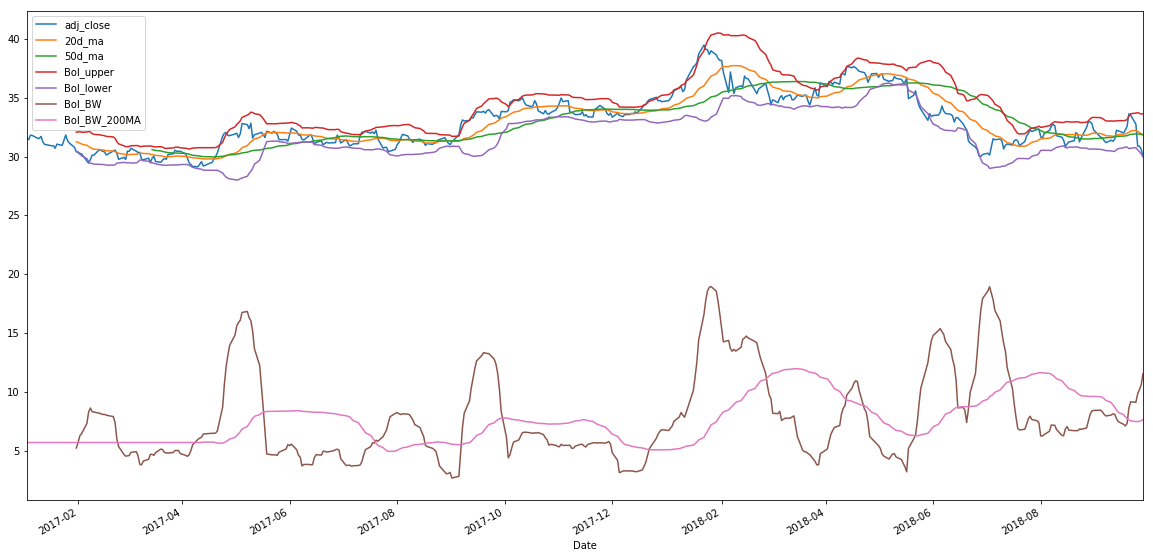

In [3]:
all_stock_df.plot(x=all_stock_df.index, y=['adj_close','20d_ma','50d_ma','Bol_upper','Bol_lower','Bol_BW','Bol_BW_200MA' ], figsize=(20,10))


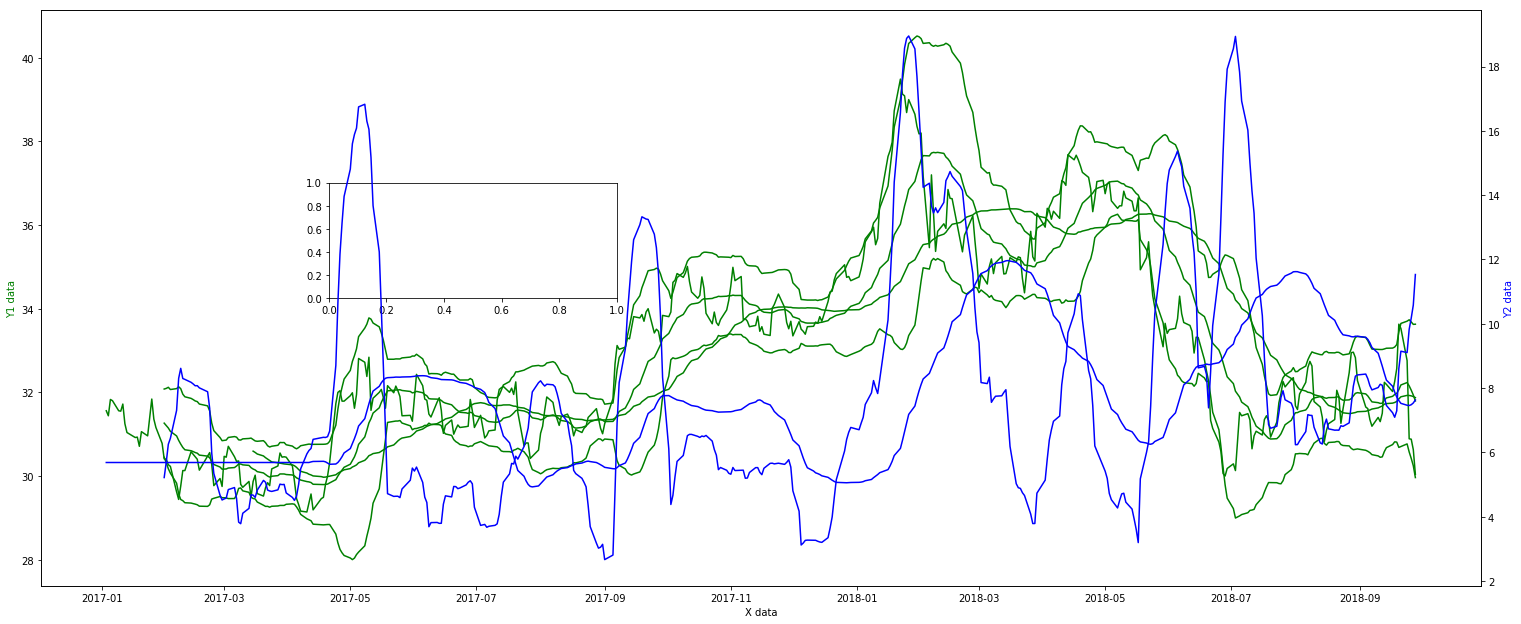

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = all_stock_df.index
y1 = all_stock_df[['adj_close','20d_ma','50d_ma','Bol_upper','Bol_lower']]
y2 = all_stock_df[['Bol_BW','Bol_BW_200MA']]

fig, ax1 = plt.subplots(figsize=(20,8))

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,.2,.2])

ax2 = ax1.twinx()
ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b')

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')

plt.show()

In [20]:
df2.tail(3)

,high,low,open,close,volume,adj_close,ticker_symbol,20d_ma,50d_ma,Bol_upper,Bol_lower,Bol_BW,Bol_BW_200MA,20d_exma,50d_exma
Date,,,,,,,,,,,,,,,
2018-09-26,31.140,30.610,30.650,30.880,273100.000,30.880,BMWYY,32.052,31.916,33.683,30.421,10.178,7.482,32.037,32.085
2018-09-27,30.850,30.550,30.620,30.630,109200.000,30.630,BMWYY,31.935,31.900,33.625,30.246,10.582,7.537,31.903,32.028
2018-09-28,30.190,29.920,30.060,30.040,95300.000,30.040,BMWYY,31.796,31.874,33.629,29.963,11.532,7.630,31.726,31.950


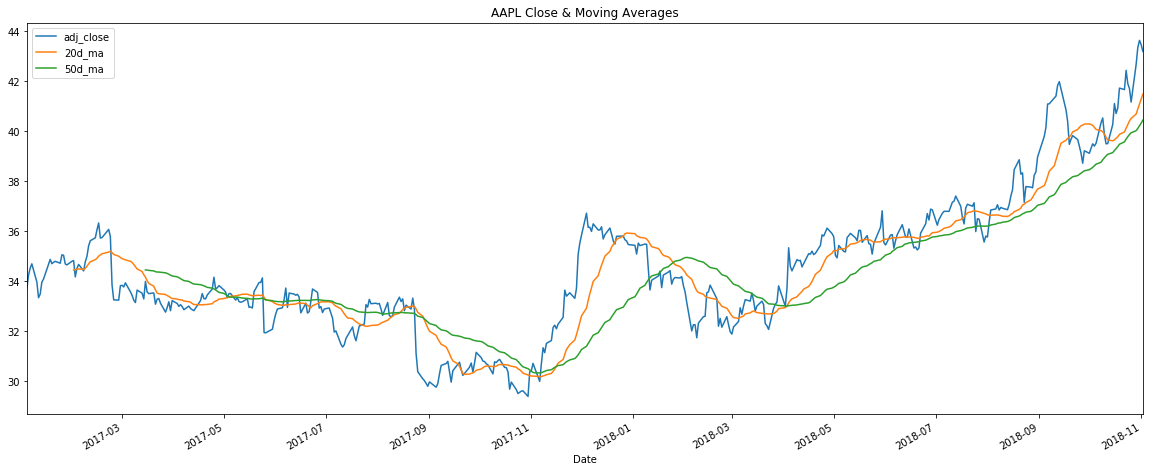

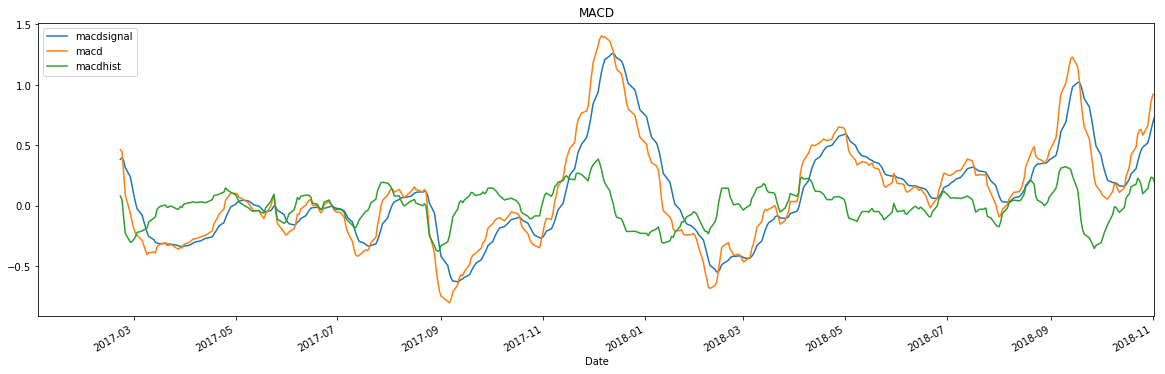

In [36]:
import datetime
import numpy
import talib

f = get_single_stock('HRL', '2017-01-01', date.today())

import talib

f['20d_ma'] = talib.SMA(numpy.asarray(f['adj_close']), 20)
f['50d_ma'] = talib.SMA(numpy.asarray(f['adj_close']), 50) 

    
#Calculate MACD to be put in a lower panel
f['macd'], f['macdsignal'], f['macdhist'] = talib.MACD(numpy.asarray(f['adj_close']), fastperiod=12, slowperiod=26, signalperiod=9)
#Plot stacked price and MACD chart
#plt.subplot(2, 1, 1)
#plt.gca().axes.get_xaxis().set_visible(False)
f.plot(y=['adj_close','20d_ma','50d_ma'], title='AAPL Close & Moving Averages', figsize=(20,8))
#plt.subplot(2, 1, 2)
f.plot(y=['macdsignal','macd','macdhist'], title='MACD', figsize=(20,6))